In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.ndimage.filters import gaussian_filter
from scipy import stats

/var/folders/6p/hll0pcr53rx1zjv426_y3zyr0000gn/T/ipykernel_99942/549189600.py:4: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [2]:
stevol = {}
for logZ in ['-3', '-2', '-1.5', '-1', '-0.5', '0', '0.5', '1']:
    stevol[logZ] = np.genfromtxt('stellar_evolution_logZ'+logZ+'.dat')

/var/folders/6p/hll0pcr53rx1zjv426_y3zyr0000gn/T/ipykernel_99942/1216340728.py:7: RuntimeWarning: invalid value encountered in divide
  alphaFe = stevol[logZ][:,4]/stevol[logZ][:,3]


(0.0, 5.0)

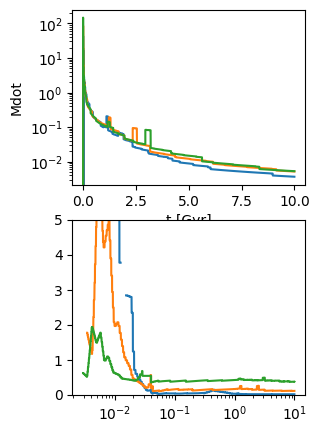

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(3, 5))

for logZ in ['-2', '0', '1']:
    time = stevol[logZ][:,0]
    Mdot = stevol[logZ][:,2]/stevol[logZ][:,1]
    Fe_rate = stevol[logZ][:,3]/stevol[logZ][:,1]
    alphaFe = stevol[logZ][:,4]/stevol[logZ][:,3]

    axs[0].plot(time, Mdot, label=logZ)
    axs[1].plot(time, alphaFe, label=logZ)

axs[0].set_xlabel('t [Gyr]')
axs[0].set_ylabel('Mdot')
axs[0].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_ylim(0, 5)

In [16]:
GFM_SOLAR_ABUNDANCE_HYDROGEN = 0.7388
GFM_SOLAR_ABUNDANCE_MAGNESIUM = 0.0007
GFM_SOLAR_ABUNDANCE_IRON   =   0.0013

/var/folders/6p/hll0pcr53rx1zjv426_y3zyr0000gn/T/ipykernel_99942/4061531374.py:11: RuntimeWarning: invalid value encountered in divide
  alphaFe = Mg/Fe


(-2.0, 2.0)

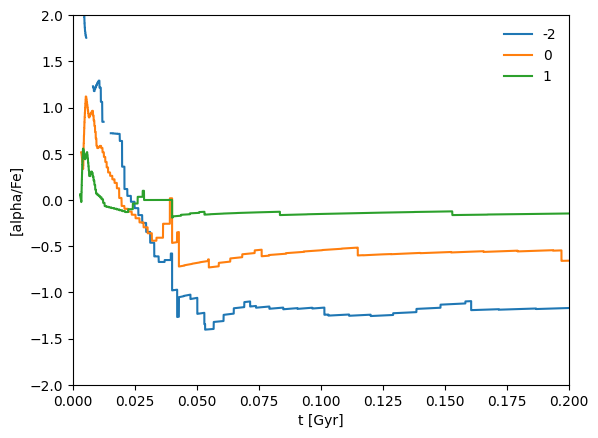

In [24]:
fig, ax = plt.subplots(1, 1)

for logZ in ['-2', '0', '1']:
    time = stevol[logZ][:,0]
    Mdot = stevol[logZ][:,2]/stevol[logZ][:,1]

    Fe = stevol[logZ][:,3]/GFM_SOLAR_ABUNDANCE_IRON
    Mg = stevol[logZ][:,4]/GFM_SOLAR_ABUNDANCE_MAGNESIUM
    
    Fe_rate = Fe/stevol[logZ][:,1]
    alphaFe = Mg/Fe

    # ax.plot(time, Mdot, label=logZ)
    ax.plot(time, np.log10(alphaFe), label=logZ)

ax.legend(frameon=False)
ax.set_xlabel('t [Gyr]')
ax.set_ylabel('[alpha/Fe]')
# ax.set_xscale('log')
ax.set_xlim(0, 0.2)
ax.set_ylim(-2, 2)

/var/folders/6p/hll0pcr53rx1zjv426_y3zyr0000gn/T/ipykernel_99942/3917920505.py:11: RuntimeWarning: invalid value encountered in divide
  alphaFe = Mg/Fe


(0.0, 1.0)

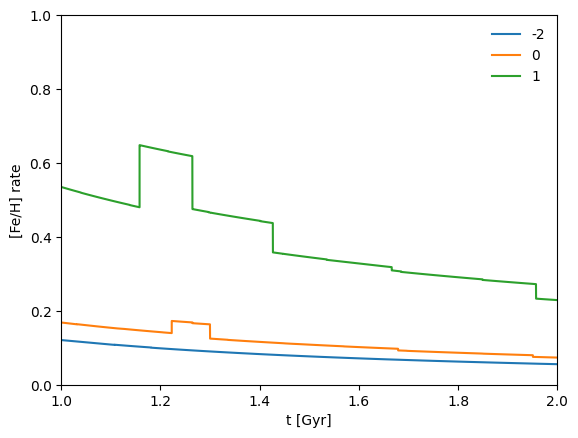

In [32]:
fig, ax = plt.subplots(1, 1)

for logZ in ['-2', '0', '1']:
    time = stevol[logZ][:,0]
    Mdot = stevol[logZ][:,2]/stevol[logZ][:,1]

    Fe = stevol[logZ][:,3]/GFM_SOLAR_ABUNDANCE_IRON
    Mg = stevol[logZ][:,4]/GFM_SOLAR_ABUNDANCE_MAGNESIUM
    
    Fe_rate = Fe/stevol[logZ][:,1]
    alphaFe = Mg/Fe

    # ax.plot(time, Mdot, label=logZ)
    ax.plot(time, Fe_rate, label=logZ)

ax.legend(frameon=False)
ax.set_xlabel('t [Gyr]')
ax.set_ylabel('[Fe/H] rate')
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlim(1, 2)
ax.set_ylim(0, 1)